In [ ]:
import os
import csv
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from config import A_CSV_PATH as input_path, CLUSTERED_FOLDER as parent_folder, A_RANGE_CSV as output_csv

In [ ]:
color_cast_folders = {
    folder_name: os.path.join(parent_folder, folder_name)
    for folder_name in os.listdir(parent_folder)
    if os.path.isdir(os.path.join(parent_folder, folder_name))
}

filename_to_rgb = {}

with open(input_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        filename = row["Filename"]
        R = float(row["R"])
        G = float(row["G"])
        B = float(row["B"])
        filename_to_rgb[filename] = (R, G, B)



In [3]:
folder_rgb_data = defaultdict(list)

for color_name, folder_path in color_cast_folders.items():
    for filename in os.listdir(folder_path):
        if filename in filename_to_rgb:
            folder_rgb_data[color_name].append(filename_to_rgb[filename])



In [ ]:
with open(output_csv, mode='w', newline='') as outcsv:
    writer = csv.writer(outcsv)
    writer.writerow(["Group", "Min_R", "Min_G", "Min_B", "Max_R", "Max_G", "Max_B"])

    for color_name, rgb_list in folder_rgb_data.items():
        if not rgb_list:
            min_r, min_g, min_b = 0, 0, 0
            max_r, max_g, max_b = 0, 0, 0
        else:
            rgb_array = np.array(rgb_list)
            # min_r, min_g, min_b = np.min(rgb_array, axis=0)
            # max_r, max_g, max_b = np.max(rgb_array, axis=0)
            q1_r, q1_g, q1_b = np.percentile(rgb_array, 30, axis=0)
            q3_r, q3_g, q3_b = np.percentile(rgb_array, 70, axis=0)
        writer.writerow([
            color_name,
            round(q1_r, 2),
            round(q1_g, 2),
            round(q1_b, 2),
            round(q3_r, 2),
            round(q3_g, 2),
            round(q3_b, 2)
        ])

C:\Users\Kah\AppData\Local\Temp\ipykernel_5944\3052591164.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ColorCast", y=channel, ax=axes[i], palette=colors[i])
C:\Users\Kah\AppData\Local\Temp\ipykernel_5944\3052591164.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ColorCast", y=channel, ax=axes[i], palette=colors[i])
C:\Users\Kah\AppData\Local\Temp\ipykernel_5944\3052591164.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ColorCast", y=channel, ax=axes[i], palette=colors[i])


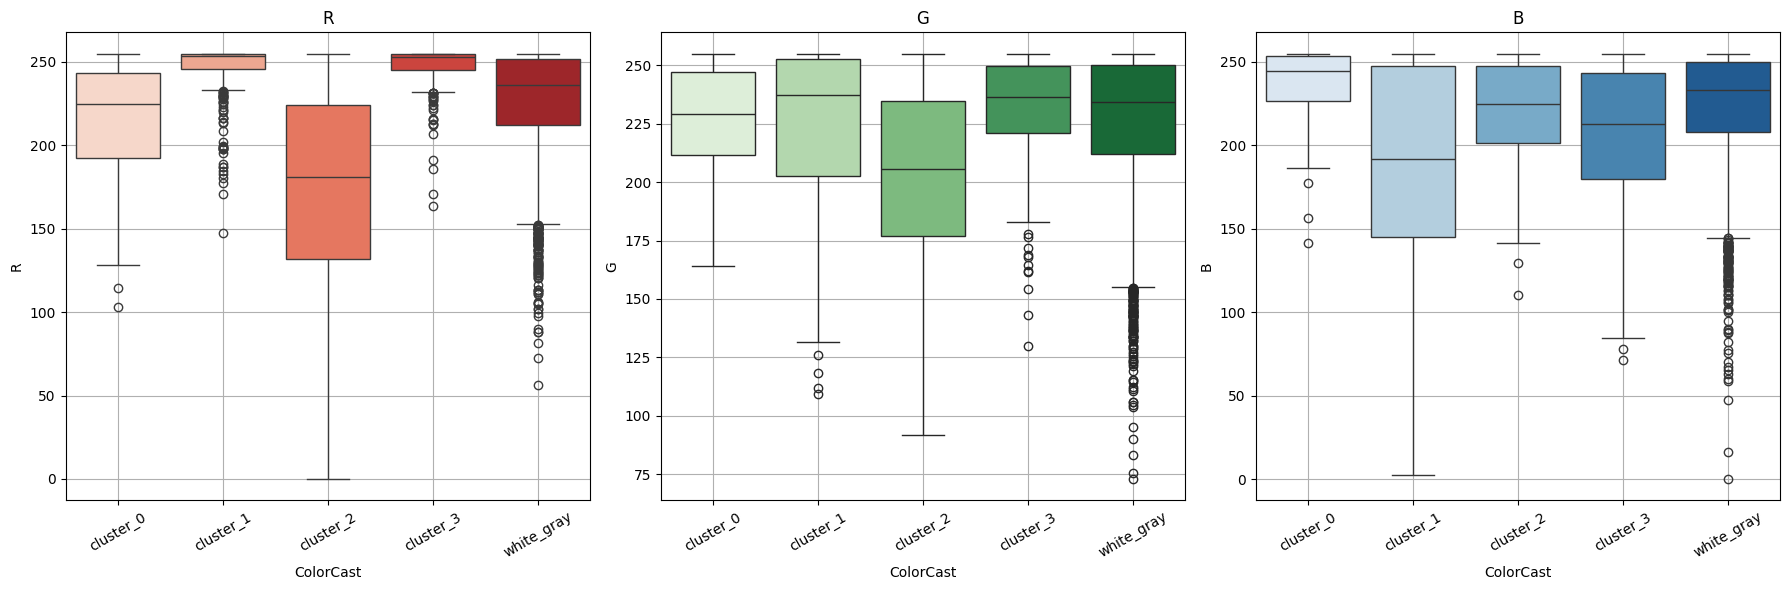

In [ ]:
data_for_plot = []
for color_name, rgb_list in folder_rgb_data.items():
    for rgb in rgb_list:
        data_for_plot.append({
            "ColorCast": color_name,
            "R": rgb[0],
            "G": rgb[1],
            "B": rgb[2]
        })

df = pd.DataFrame(data_for_plot)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

channels = ["R", "G", "B"]
colors = ["Reds", "Greens", "Blues"]
titles = ["R", "G", "B"]

for i, channel in enumerate(channels):
    sns.boxplot(data=df, x="ColorCast", y=channel, ax=axes[i], palette=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(channel)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

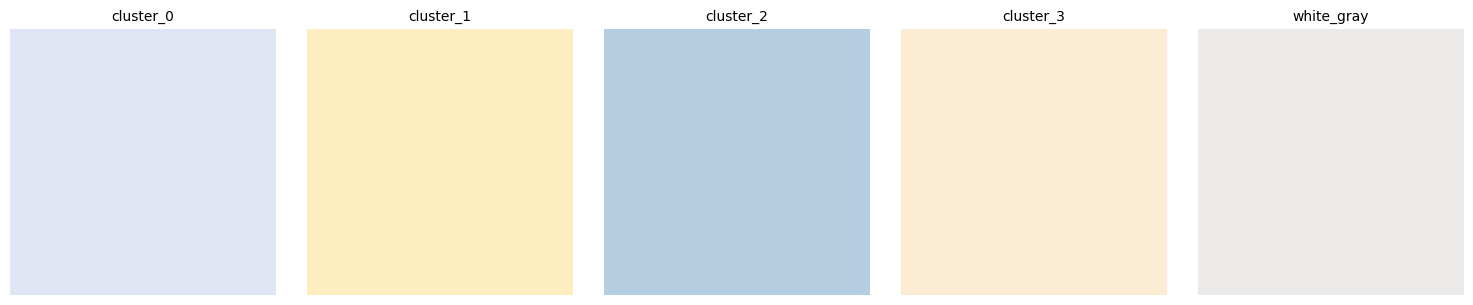

In [9]:
quantile_colors = {}
i = 50
for color_name, rgb_list in folder_rgb_data.items():
    if rgb_list:
        rgb_array = np.array(rgb_list)
        quantile_r, quantile_g, quantile_b = np.percentile(rgb_array, i, axis=0)
        quantile_colors[color_name] = (int(quantile_r), int(quantile_g), int(quantile_b))

# Vẽ màu
fig, ax = plt.subplots(1, len(quantile_colors), figsize=(15, 3))

for idx, (color_name, (r, g, b)) in enumerate(quantile_colors.items()):
    ax[idx].imshow(np.ones((10, 10, 3), dtype=np.uint8) * [r, g, b])
    ax[idx].set_title(f"{color_name}", fontsize=10)
    ax[idx].axis('off')
plt.tight_layout()
plt.show()